### Simulate the Monty Hall Problem

- Simulate three doors, one car, and two goats.
 - Simulate three players: the switcher, the conservative, and the newcomer. 
 - Record who wins.
 - Repeat it many times.
 - Which player do you want to be?
 
 - What would happen if you had 100 doors to choose from and the presenter opens 98 or them?
 
- And what if you had $N$ doors to choose from and the presenter opens $M\leq N-2$ of them? Study how the probability of winning changes as a function of $M$ and $N$.

In [33]:
import numpy as np
from matplotlib import pyplot as plt
from scipy import stats

from sklearn.neighbors import KernelDensity

from astropy.visualization import hist
from sklearn.mixture import GaussianMixture

plt.rc('text', usetex=True)  # Abilita l'uso di LaTeX in tutte le stringhe di testo
plt.rc('font', family='serif')

%matplotlib inline
%config InlineBackend.figure_format='retina'

## Create N doors

In [2]:
#goats = 0
#car = 1

def create_doors(N):
    d=np.zeros(N)
    d[np.random.randint(0, N)] = 1
    
    return d

### Game with Three doors

In [27]:
def switch_game(doors, choice):

    if doors[choice]==0:
        return 1
    else: return 0

def cons_game(doors, choice):
    
    if doors[choice]==0:
        return 0
    else: return 1

def new_game(doors, choice):
    
    doors_open = np.random.choice([i for i in range(N) if i != choice and i != np.where(doors == 1)[0][0]])
    available_indices = [i for i in range(N) if i != doors_open]
    new_choice = np.random.choice(available_indices, 1)
   
    if doors[new_choice]==0:
        return 0
    else: return 1

def plot_hist(x, lab):
    
    plt.figure(figsize=(3, 3))
    bins = [-0.5, 0.5, 1.5]
    plt.hist(x, bins, histtype='bar',  density=True, align='mid', width=0.8, color='violet', alpha=0.5)
    plt.title(f'{lab}')
    plt.xticks([0, 1], ['goat', 'car'])
    plt.show()


In [28]:
N = 3 #doors
games = 10000
game_s = np.empty(games)
game_c = np.empty(games)
game_n = np.empty(games)

for i in range(games):
    doors = create_doors(N)
    choice = np.random.randint(0, N)
    #print('doors', doors)
    #print('choice', choice)
    game_s[i] = switch_game(doors, choice)
    game_c[i] = cons_game(doors, choice)
    game_n[i] = new_game(doors, choice)

s_loose=len(np.where(game_s==0)[0])
s_win=games-s_loose
print('switcher wins', s_win, 'times and loose', s_loose, 'times -> probability of winning is', s_win/games)

c_loose=len(np.where(game_c==0)[0])
c_win=games-c_loose
print('conservative wins', c_win, 'times and loose', c_loose, 'times-> probability of winning is', c_win/games)

n_loose=len(np.where(game_n==0)[0])
n_win=games-n_loose
print('newcomer wins', n_win, 'times and loose', n_loose, 'times-> probability of winning is', n_win/games)


switcher wins 6597 times and loose 3403 times -> probability of winning is 0.6597
conservative wins 3403 times and loose 6597 times-> probability of winning is 0.3403
newcomer wins 4995 times and loose 5005 times-> probability of winning is 0.4995


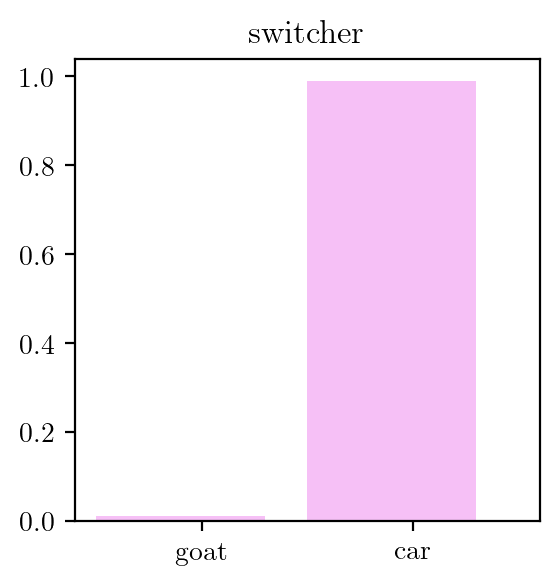

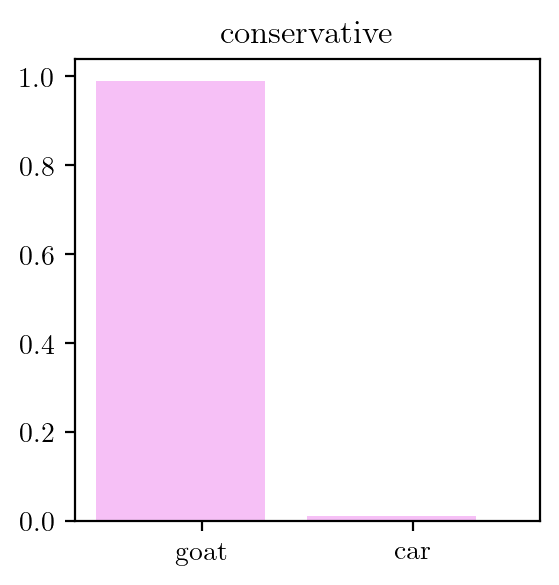

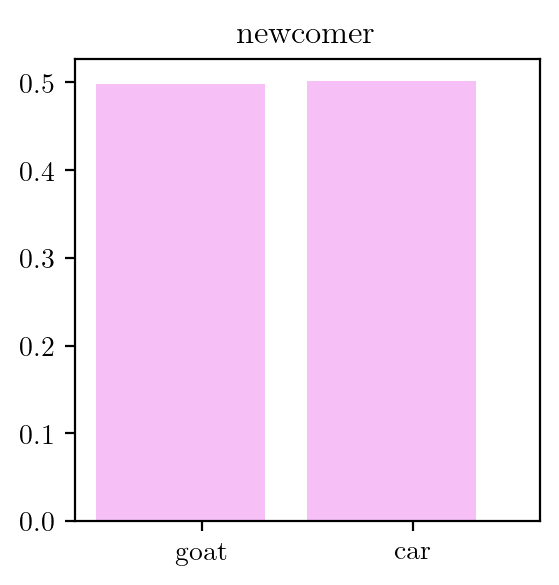

In [34]:
plot_hist(game_s, 'switcher')
plot_hist(game_c, 'conservative')
plot_hist(game_n, 'newcomer')

### 100 doors and the presenter open 98

In [30]:
def new_game_98 (doors, choice):
    
    doors_open = np.random.choice([i for i in range(N) if i != choice and i != np.where(doors == 1)[0][0]], 98, replace=False) 
    #print(doors_open)
    available_indices = [i for i in range(N) if i not in doors_open]
    new_choice = np.random.choice(available_indices, 1)
   
    if doors[new_choice]==0:
        return 0
    else: return 1

In [31]:
N = 100
games = 10000
game_s = np.empty(games)
game_c = np.empty(games)
game_n = np.empty(games)

for i in range(games):
    doors = create_doors(N)
    choice = np.random.randint(0, N)
    game_s[i] = switch_game(doors, choice)
    game_c[i] = cons_game(doors, choice)
    game_n[i] = new_game_98(doors, choice)

s_loose=len(np.where(game_s==0)[0])
s_win=games-s_loose
print('switcher wins', s_win, 'times and loose', s_loose, 'times -> probability of winning is', s_win/games)

c_loose=len(np.where(game_c==0)[0])
c_win=games-c_loose
print('conservative wins', c_win, 'times and loose', c_loose, 'times-> probability of winning is', c_win/games)

n_loose=len(np.where(game_n==0)[0])
n_win=games-n_loose
print('newcomer wins', n_win, 'times and loose', n_loose, 'times-> probability of winning is', n_win/games)

switcher wins 9899 times and loose 101 times -> probability of winning is 0.9899
conservative wins 101 times and loose 9899 times-> probability of winning is 0.0101
newcomer wins 5017 times and loose 4983 times-> probability of winning is 0.5017


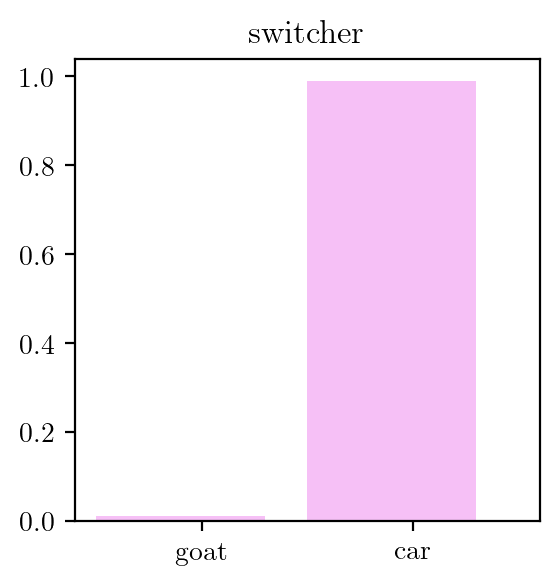

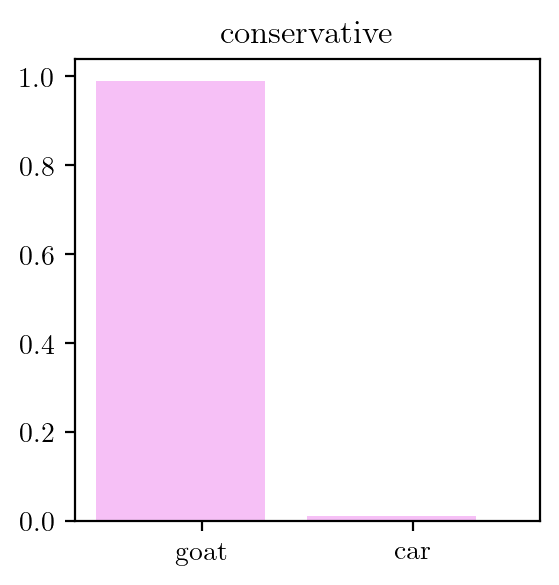

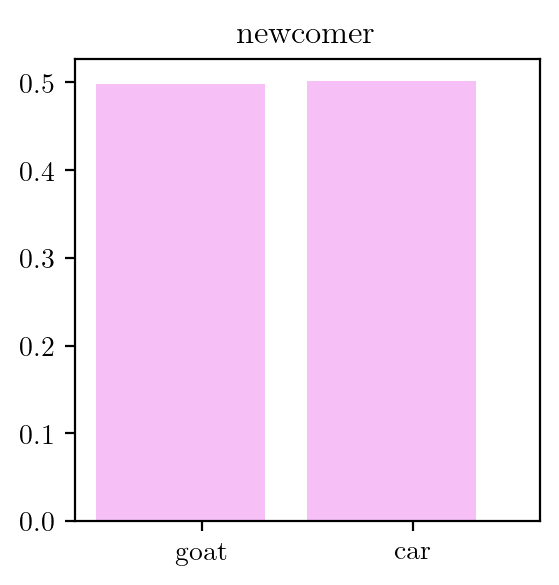

In [35]:
plot_hist(game_s, 'switcher')
plot_hist(game_c, 'conservative')
plot_hist(game_n, 'newcomer')

### N doors and the presenter open M<N-2 (4/09) (magari questo rivedi la visualizzazione)

In [37]:
def new_switch_game(doors, choice, M):

    if doors[choice]==1:
        return 0
    else:
        doors_open = np.random.choice([i for i in range(N) if i != choice and i != np.where(doors == 1)[0][0]], M, replace=False) 
        #print(doors_open)
        available_indices = [i for i in range(N) if i not in doors_open and i != choice]
        new_choice = np.random.choice(available_indices, 1)
        
        if doors[new_choice] == 1:
            return 1
        else:
            return 0

def new_new_game (doors, choice):
    
    doors_open = np.random.choice([i for i in range(N) if i != choice and i != np.where(doors == 1)[0][0]], M, replace=False) 
    #print(doors_open)
    available_indices = [i for i in range(N) if i not in doors_open]
    new_choice = np.random.choice(available_indices, 1)
   
    if doors[new_choice]==0:
        return 0
    else: return 1

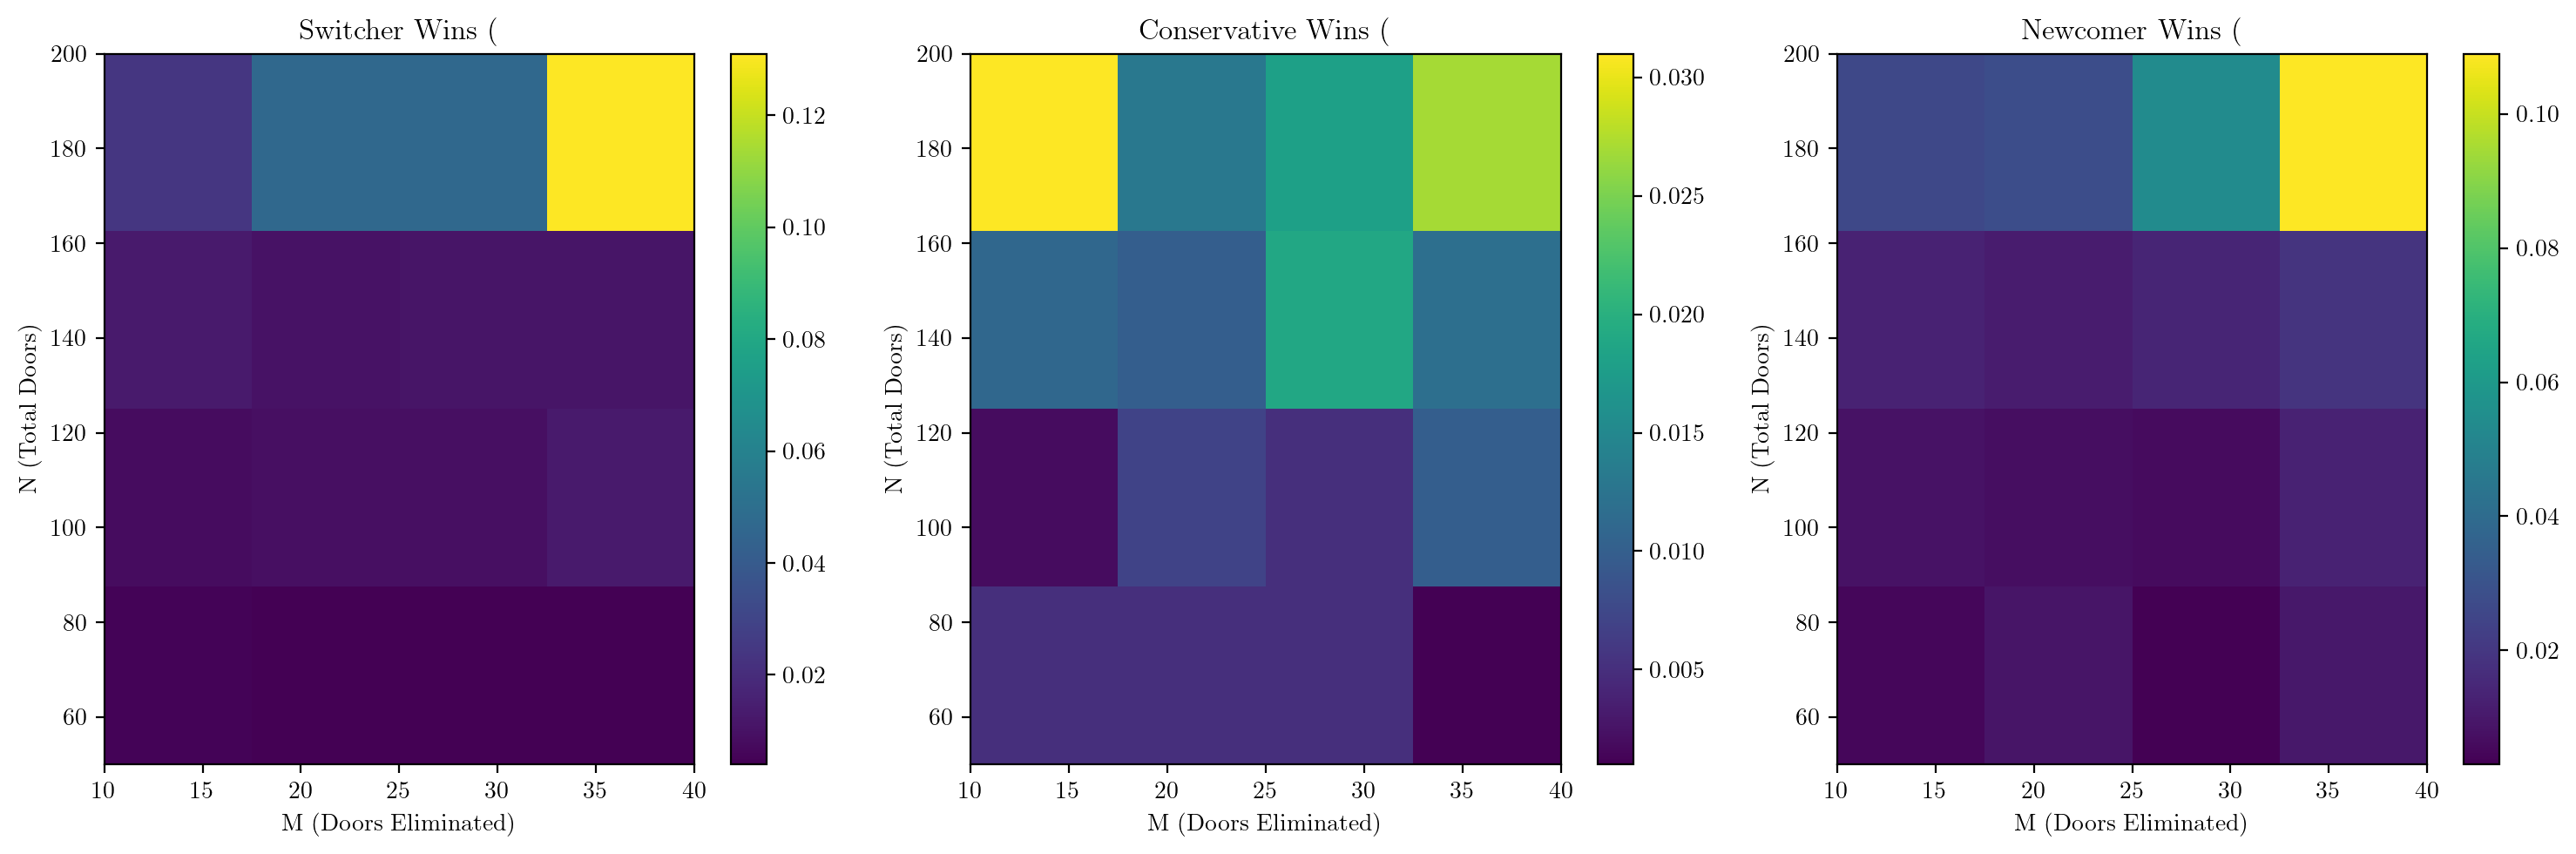

In [39]:

games = 1000  
N_values = [50, 100, 150, 200]  
M_values = [10, 20, 30, 40] 

results_switch = np.zeros((len(N_values), len(M_values)))
results_conservative = np.zeros((len(N_values), len(M_values)))
results_newcomer = np.zeros((len(N_values), len(M_values)))

for ni, N in enumerate(N_values):
    for mi, M in enumerate(M_values):
        game_s = np.empty(games)
        game_c = np.empty(games)
        game_n = np.empty(games)
        
        for i in range(games):
            doors = create_doors(N)
            choice = np.random.randint(0, N)
            game_s[i] = new_switch_game(doors, choice, M)
            game_c[i] = cons_game(doors, choice)
            game_n[i] = new_new_game(doors, N)
        
        s_win = np.sum(game_s)
        c_win = np.sum(game_c)
        n_win = np.sum(game_n)
        
        results_switch[ni, mi] = s_win / games
        results_conservative[ni, mi] = c_win / games
        results_newcomer[ni, mi] = n_win / games

#winning plots
fig, ax = plt.subplots(1, 3, figsize=(15, 5))

c = ax[0].imshow(results_switch, cmap='viridis', aspect='auto', extent=[min(M_values), max(M_values), min(N_values), max(N_values)])
ax[0].set_title('Switcher Wins (%)')
ax[0].set_xlabel('M (Doors Eliminated)')
ax[0].set_ylabel('N (Total Doors)')
fig.colorbar(c, ax=ax[0])

c = ax[1].imshow(results_conservative, cmap='viridis', aspect='auto', extent=[min(M_values), max(M_values), min(N_values), max(N_values)])
ax[1].set_title('Conservative Wins (%)')
ax[1].set_xlabel('M (Doors Eliminated)')
ax[1].set_ylabel('N (Total Doors)')
fig.colorbar(c, ax=ax[1])

c = ax[2].imshow(results_newcomer, cmap='viridis', aspect='auto', extent=[min(M_values), max(M_values), min(N_values), max(N_values)])
ax[2].set_title('Newcomer Wins (%)')
ax[2].set_xlabel('M (Doors Eliminated)')
ax[2].set_ylabel('N (Total Doors)')
fig.colorbar(c, ax=ax[2])

plt.tight_layout()
plt.show()